###CIFAR 10

In [19]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 50
num_classes = 10
batch_size = 100
learning_rate = 0.001

# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(8*8*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


Files already downloaded and verified
Epoch [1/50], Step [100/500], Loss: 1.2370
Epoch [1/50], Step [200/500], Loss: 1.2901
Epoch [1/50], Step [300/500], Loss: 1.1804
Epoch [1/50], Step [400/500], Loss: 1.1214
Epoch [1/50], Step [500/500], Loss: 1.0335
Epoch [2/50], Step [100/500], Loss: 0.8563
Epoch [2/50], Step [200/500], Loss: 1.0783
Epoch [2/50], Step [300/500], Loss: 1.1338
Epoch [2/50], Step [400/500], Loss: 1.0869
Epoch [2/50], Step [500/500], Loss: 0.9527
Epoch [3/50], Step [100/500], Loss: 1.0052
Epoch [3/50], Step [200/500], Loss: 1.0492
Epoch [3/50], Step [300/500], Loss: 0.8118
Epoch [3/50], Step [400/500], Loss: 1.1509
Epoch [3/50], Step [500/500], Loss: 0.8789
Epoch [4/50], Step [100/500], Loss: 0.7989
Epoch [4/50], Step [200/500], Loss: 0.9987
Epoch [4/50], Step [300/500], Loss: 0.7731
Epoch [4/50], Step [400/500], Loss: 0.8006
Epoch [4/50], Step [500/500], Loss: 0.7526
Epoch [5/50], Step [100/500], Loss: 0.9664
Epoch [5/50], Step [200/500], Loss: 0.9184
Epoch [5/50], St

In [20]:
import matplotlib.pyplot as plt

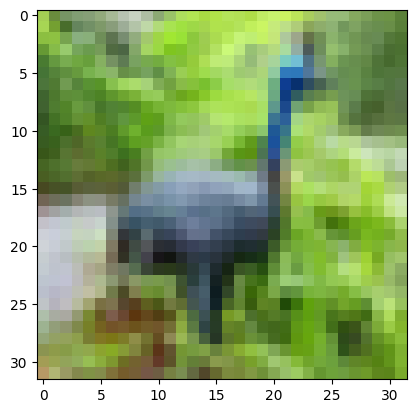

In [21]:
plt.imshow(train_dataset[6][0].permute(1,2,0))

In [35]:
cat_img = torchvision.io.read_image('sample_cat.jpg')

In [36]:
cat_img.shape

torch.Size([3, 842, 1263])

In [37]:
train_dataset[0][0].shape

torch.Size([3, 32, 32])

In [38]:
cat_img

tensor([[[112, 112, 112,  ..., 208, 208, 208],
         [113, 113, 113,  ..., 208, 208, 208],
         [114, 114, 114,  ..., 208, 208, 208],
         ...,
         [109, 105, 104,  ...,  81,  81,  80],
         [112, 108, 108,  ...,  81,  80,  80],
         [112, 108, 108,  ...,  81,  80,  80]],

        [[ 77,  77,  77,  ..., 223, 223, 223],
         [ 78,  78,  78,  ..., 223, 223, 223],
         [ 79,  79,  79,  ..., 223, 223, 223],
         ...,
         [102,  98, 100,  ...,  71,  71,  70],
         [106, 102, 102,  ...,  71,  70,  70],
         [106, 102, 102,  ...,  71,  70,  70]],

        [[ 71,  71,  71,  ..., 244, 244, 244],
         [ 72,  72,  72,  ..., 244, 244, 244],
         [ 73,  73,  73,  ..., 244, 244, 244],
         ...,
         [ 92,  88,  89,  ...,  70,  70,  69],
         [ 94,  90,  90,  ...,  72,  71,  71],
         [ 94,  90,  90,  ...,  72,  71,  71]]], dtype=torch.uint8)

In [41]:
cat_img_resized = transforms.Resize((32,32))(cat_img)

In [42]:
cat_img_resized.shape

torch.Size([3, 32, 32])

In [43]:
cat_img_resized

tensor([[[115, 120, 125,  ..., 184, 201, 212],
         [113, 120, 127,  ..., 151, 197, 214],
         [114, 123, 133,  ...,  84, 166, 209],
         ...,
         [ 36,  33,  56,  ...,  85,  93,  88],
         [ 29,  28,  52,  ...,  74,  80,  90],
         [ 23,  21,  53,  ...,  61,  68,  85]],

        [[ 81,  86,  87,  ..., 200, 218, 227],
         [ 80,  84,  88,  ..., 163, 213, 229],
         [ 79,  86,  94,  ...,  86, 180, 225],
         ...,
         [ 36,  33,  56,  ...,  79,  72,  66],
         [ 29,  28,  52,  ...,  72,  67,  70],
         [ 21,  22,  53,  ...,  68,  68,  73]],

        [[ 76,  83,  84,  ..., 218, 235, 245],
         [ 77,  83,  86,  ..., 175, 231, 247],
         [ 78,  83,  88,  ...,  84, 194, 242],
         ...,
         [ 34,  33,  58,  ...,  87,  67,  57],
         [ 27,  28,  54,  ...,  84,  66,  62],
         [ 19,  21,  55,  ...,  87,  79,  73]]], dtype=torch.uint8)

In [44]:
cat_img_resized = cat_img_resized / 255

In [51]:
cat_img_resized

tensor([[[0.4510, 0.4706, 0.4902,  ..., 0.7216, 0.7882, 0.8314],
         [0.4431, 0.4706, 0.4980,  ..., 0.5922, 0.7725, 0.8392],
         [0.4471, 0.4824, 0.5216,  ..., 0.3294, 0.6510, 0.8196],
         ...,
         [0.1412, 0.1294, 0.2196,  ..., 0.3333, 0.3647, 0.3451],
         [0.1137, 0.1098, 0.2039,  ..., 0.2902, 0.3137, 0.3529],
         [0.0902, 0.0824, 0.2078,  ..., 0.2392, 0.2667, 0.3333]],

        [[0.3176, 0.3373, 0.3412,  ..., 0.7843, 0.8549, 0.8902],
         [0.3137, 0.3294, 0.3451,  ..., 0.6392, 0.8353, 0.8980],
         [0.3098, 0.3373, 0.3686,  ..., 0.3373, 0.7059, 0.8824],
         ...,
         [0.1412, 0.1294, 0.2196,  ..., 0.3098, 0.2824, 0.2588],
         [0.1137, 0.1098, 0.2039,  ..., 0.2824, 0.2627, 0.2745],
         [0.0824, 0.0863, 0.2078,  ..., 0.2667, 0.2667, 0.2863]],

        [[0.2980, 0.3255, 0.3294,  ..., 0.8549, 0.9216, 0.9608],
         [0.3020, 0.3255, 0.3373,  ..., 0.6863, 0.9059, 0.9686],
         [0.3059, 0.3255, 0.3451,  ..., 0.3294, 0.7608, 0.

In [55]:
model(cat_img_resized.reshape(1, 3, 32, 32).to(device))

tensor([[ -6.7592,  -7.2855,  -1.6966,  -0.2480, -11.5297,  -6.4136,  -8.4284,
          -8.3535,  -2.3076,   2.5765]], device='cuda:0',
       grad_fn=<AddmmBackward0>)